# CS4168 Data Mining

## Lab 2: Data Preparation

**David Walsh 20276885**

*Ensure that you have:*
* encoded all categorical attributes as numerical
* treated/filled in missing values
* applied scaler where necessary
* treated outliers appropriately
* created at least one new feature from the existing ones

# 1. Importing Libraries & Dataset

In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
# Loading the dataset
df = pd.read_csv("./bank.csv")

In [59]:
# Display the last 6 rows of the dataframe to understand its structure and the data it contains
df.tail(6)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1994,26.0,student,single,secondary,no,655,no,no,cellular,16,sep,190,1,-1,0,NaN,yes
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


Categorical attributes:
* job - The occupation of an individual.
* marital - The marital status of an individual.
* education - The education level of an individual.
* default - Whether an individual has credit in default.
* housing - Whether an individual has a housing loan.
* loan - Whether an individual has a personal loan.
* contact - The type of communication contact with an individual.
* month - The last contact month of the year.
* poutcome - The outcome of the previous marketing campaign.
* subscribed - Whether an individual has subscribed to a term deposit.

Numerical attributes (are typically although in certain contexts they could be binned into categories):
* age
* balance
* day
* duration
* campaign
* pdays
* previous

The provided month attribute, while appearing as text, actually represents a time-related variable, which is often treated as categorical in analyses because it represents distinct and finite groups.

In [60]:
# Check for missing values in the dataset to identify if any columns require handling of missing data
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

Checking for missing values:
* age has 12 missing values.
* job has 10 missing values.
* education has 104 missing values.
* contact has 191 missing values.
* poutcome has 454 missing values.

In [61]:
# Make a copy of the original dataset before performing any transformations. This is useful for comparison or to revert any changes if necessary
df_original = df

# 2. Process and Encode the Categorical Features

## 2.1 Encode Ordinal Categorical Attributes

In [62]:
# Check the distribution of values in the 'education' and 'month' columns to understand how to map them to numerical values
df['month'].value_counts()

feb    404
may    333
jan    245
apr    205
jul    167
aug    136
sep    134
jun    104
oct     93
mar     70
nov     68
dec     41
Name: month, dtype: int64

In [63]:
df['education'].value_counts()

secondary    995
tertiary     684
primary      217
Name: education, dtype: int64

In [64]:
# Education mapper

# Map ordinal categorical values in 'education' to numerical values, preserving their order
scale_mapper_education = {"primary": 0, "secondary": 1, "tertiary": 2}

df['education'] = df['education'].replace(scale_mapper_education)

In [65]:
# Month mapper

# Similarly, map months to numerical values, assuming 'jan' as 0 and incrementing by 1 for each subsequent month
scale_mapper_month = {"jan": 0, "feb": 1, "mar": 2, "apr": 3, "may": 4, "jun": 5, "jul": 6, "aug": 7, "sep": 8, "oct": 9, "nov": 10, "dec": 11}

df['month'] = df['month'].replace(scale_mapper_month)

df.tail() # Display the last few rows to verify the changes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,8,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,8,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,8,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,8,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,8,208,2,-1,0,NaN,yes


## 2.2 One-Hot Encode All Other Categorical Attributes

In [66]:
# One-hot encode the categorical cols with NaNs

print(df['job'].value_counts()) # # Before one-hot encoding, check the distribution of 'job' categories to evaluate the necessity of encoding

# Perform one-hot encoding on 'job', 'contact', and 'poutcome' columns. Also, handle NaN values by creating a separate column and drop the first category to avoid dummy variable trap.
df = pd.get_dummies(df, columns=['job', 'contact', 'poutcome'], dummy_na = True, drop_first = True)

df.tail()

management       461
technician       348
blue-collar      298
admin.           247
services         165
retired          162
student           96
unemployed        69
self-employed     64
entrepreneur      45
housemaid         35
Name: job, dtype: int64


,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,8,327,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,1.0,no,127,no,no,16,8,1334,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,0.0,no,1154,no,no,17,8,231,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,0.0,no,4343,yes,no,20,8,185,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,1.0,no,6403,no,no,22,8,208,...,0,0,0,0,0,0,0,0,0,1


In [67]:
# One-hot encode the remaining categorical columns that were not explicitly mentioned before

df = pd.get_dummies(df, drop_first = True)
df.tail()

,age,education,balance,day,month,duration,campaign,pdays,previous,job_blue-collar,...,contact_nan,poutcome_other,poutcome_success,poutcome_nan,marital_married,marital_single,default_yes,housing_yes,loan_yes,subscribed_yes
1995,20.0,NaN,2785,16,8,327,2,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
1996,28.0,1.0,127,16,8,1334,2,-1,0,0,...,0,0,0,1,0,1,0,0,0,1
1997,81.0,0.0,1154,17,8,231,1,-1,0,0,...,0,0,0,1,1,0,0,0,0,1
1998,46.0,0.0,4343,20,8,185,1,-1,0,0,...,1,0,0,1,1,0,0,1,0,1
1999,40.0,1.0,6403,22,8,208,2,-1,0,0,...,0,0,0,1,1,0,0,0,0,1


# 3. Treatment of Missing Values in Numerical Columns

In [68]:
# Recheck for any null/NaN values in the dataset that need to be addressed

df.isna().sum()

age                   12
education            104
balance                0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
marital_married        0
marital_single         0
default_yes            0
housing_yes            0
loan_yes               0
subscribed_yes         0
dtype: int64

The education attribute particularly contains NaNs, while age has nulls.


## 3.1 Imputing Missing Values


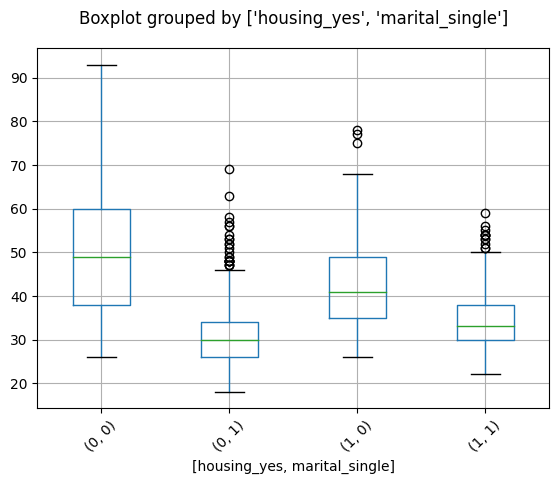

In [69]:
# Visualize the distribution of 'age' using a boxplot, segmented by 'housing_yes' and 'marital_single' to determine if there's a pattern that can be used for imputation

df.boxplot(column = 'age', by = ['housing_yes', 'marital_single'], rot = 45)
plt.title("")
plt.show()

In [70]:
# Create a pivot table to find the median age for combinations of 'marital_single' and 'housing_yes'. This will be used for more informed imputation.

ptable = df.pivot_table(values = 'age', index = 'marital_single', columns = 'housing_yes', aggfunc = np.median)
ptable

housing_yes,0,1
marital_single,,
0,49.0,41.0
1,30.0,33.0


In [71]:
# Define a function to fetch the median age for a given combination of 'marital_single' and 'housing_yes'

def get_element(x):
    return ptable.loc[x['marital_single'], x['housing_yes']]

# Fill missing 'age' values by applying the function defined above to each row with a missing 'age' value
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace = True) # Replace missing values

In [72]:
# For missing 'education' values, simply fill them with the median of the 'education' column
df['education'].fillna(df['education'].median(), inplace = True)

# 4. Rescaling Features

In [73]:
# Instantiate the RobustScaler. This scaler is less sensitive to outliers.
robust_scaler = RobustScaler()

# Apply RobustScaler to 'previous' and 'campaign' columns to reduce the influence of outliers
df[['campaign', 'previous',]] = robust_scaler.fit_transform(df[['campaign', 'previous']])

# Scale 'education' by dividing by the maximum value (3, since we have 0, 1, 2 after encoding)
df['education'] = df['education'] / 3

# 5. Treatment of Outliers

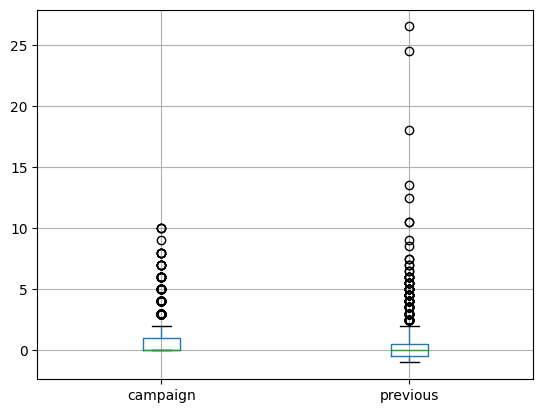

In [74]:
df.boxplot(column=['campaign', 'previous'])
plt.show()

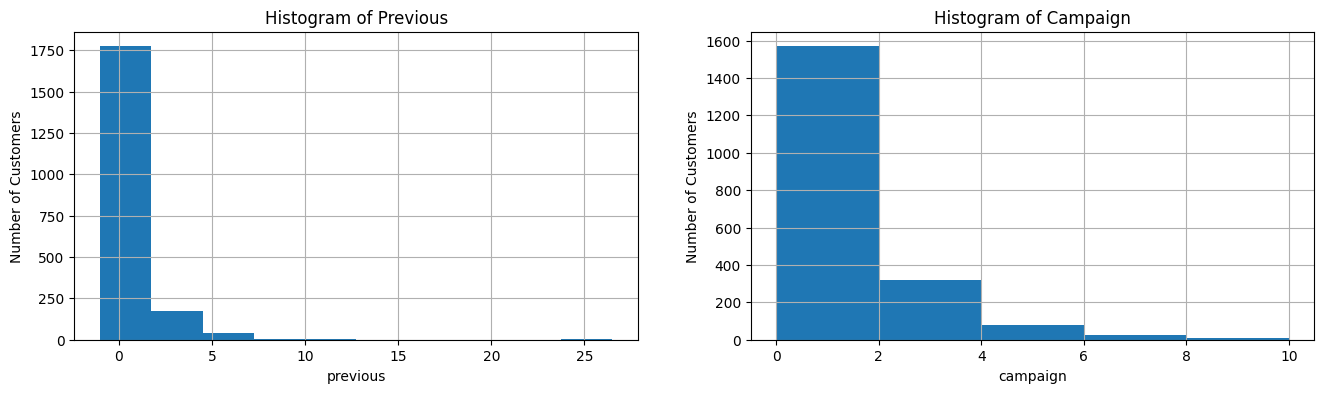

In [75]:
# Create a figure for plotting histograms of  and 'campaign' and 'previous' to visualize the distribution and identify outliers

fig = plt.figure(figsize = (16, 4))

# Plot histogram for 'campaign'
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Campaign")
ax3.set_xlabel('campaign')
ax3.set_ylabel('Number of Customers')
df['campaign'].hist(bins=5)

# Plot histogram for 'previous'
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Previous")
ax1.set_xlabel('previous')
ax1.set_ylabel('Number of Customers')
df['previous'].hist(bins=10)

plt.show()

In [76]:
df[['campaign', 'previous']].min()

campaign    0.0
previous   -1.0
dtype: float64

In [77]:
# Apply a log transformation to 'previous' and 'campaign' to reduce the skewness caused by outliers

df['campaign'] = np.log(df['campaign'] + abs(min(df['campaign'])) + 1)
df['previous'] = np.log(df['previous'] + abs(min(df['previous'])) + 1)

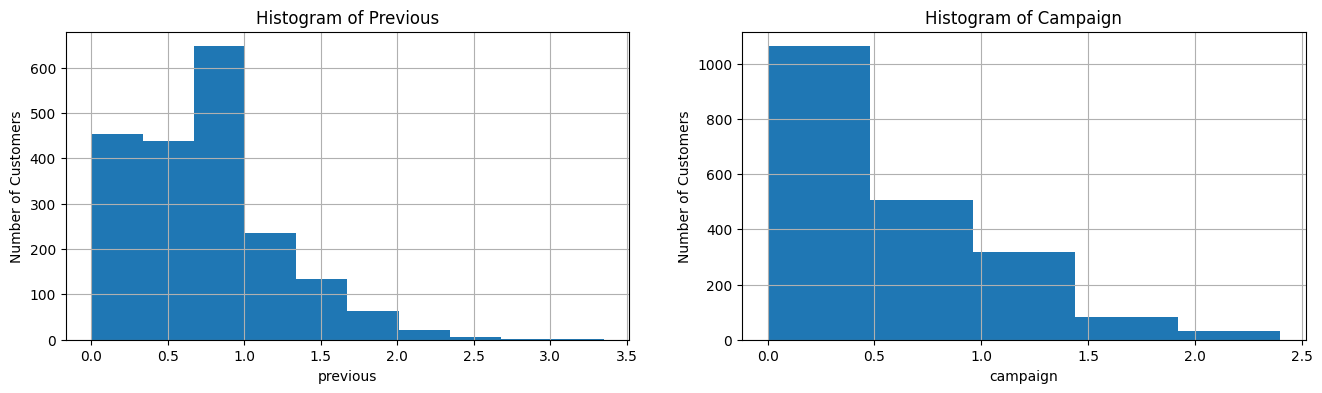

In [78]:
# Plot the histograms again to visualize the effect of the log transformation on reducing the impact of outliers

fig = plt.figure(figsize = (16, 4))

# Repeat the plotting process for transformed 'campaign' and 'previous'
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of Campaign")
ax3.set_xlabel('campaign')
ax3.set_ylabel('Number of Customers')
df['campaign'].hist(bins=5)

ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of Previous")
ax1.set_xlabel('previous')
ax1.set_ylabel('Number of Customers')
df['previous'].hist(bins=10)

plt.show()

# 5. Creation of Derived Features

In [79]:
# Create a new feature 'total_contact' by adding 'campaign' and 'previous' from the original dataset
df['total_contact'] = df_original['campaign'] + df_original['previous']

# Scale 'total_contact' using RobustScaler to maintain consistency with other scaled features
df[['total_contact']] = robust_scaler.fit_transform(df[['total_contact']])

df[['total_contact']].min()

total_contact   -0.666667
dtype: float64

In [80]:
# Apply a log transformation to 'total_contact' to reduce the impact of outliers, adding a constant to shift all values into the positive domain before logging

df['total_contact'] = np.log(df['total_contact'] + 2.19)

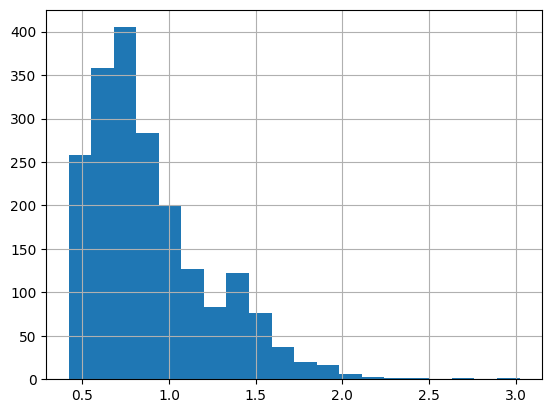

In [81]:
# Visualize the distribution of 'total_contact' after transformation

df['total_contact'].hist(bins = 20)
plt.show()

# 6. Save the Updated Prepared Dataset

In [82]:
# # Perform a final check for any missing values to ensure the dataset is clean and ready for modeling

print(df.isna().sum())

age                  0
education            0
balance              0
day                  0
month                0
duration             0
campaign             0
pdays                0
previous             0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_nan              0
contact_telephone    0
contact_nan          0
poutcome_other       0
poutcome_success     0
poutcome_nan         0
marital_married      0
marital_single       0
default_yes          0
housing_yes          0
loan_yes             0
subscribed_yes       0
total_contact        0
dtype: int64


In [83]:
# Save the transformed and cleaned dataset to a new CSV file

df.to_csv('bank_updated.csv')